In [52]:
#You are given image of size 800x600 pixels. 
# Divide this image into tiles 100x75 pixels each, and save each tile as a separate image file in a specified output folder.

from PIL import Image
from PIL import ImageDraw, ImageFont
import os
import cv2
from skimage import color
from skimage.feature import hog
from matplotlib import pyplot as plt

def split_image_into_tiles(image_path, tile_width, tile_height, output_folder):
    # Open the image
    img = Image.open(image_path)
    img_width, img_height = img.size

    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Calculate number of tiles in each dimension
    num_tiles_x = img_width // tile_width
    num_tiles_y = img_height // tile_height

    # Loop through and save each tile
    for i in range(num_tiles_x):
        for j in range(num_tiles_y):
            left = i * tile_width
            upper = j * tile_height
            right = left + tile_width
            lower = upper + tile_height

            # Crop the image to get the tile
            tile = img.crop((left, upper, right, lower))

            # Save the tile with a unique name
            tile_filename = f'tile_{i}_{j}.png'
            tile.save(os.path.join(output_folder, tile_filename))


#Draw the grid on the original image for visualization. 
# change below code to show number on the tiles as well.
def draw_grid_on_image(image_path, tile_width, tile_height, output_path):
    # Open the image
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)
    img_width, img_height = img.size

    # Draw vertical lines
    for x in range(0, img_width, tile_width):
        draw.line([(x, 0), (x, img_height)], fill='red', width=2)

    # Draw horizontal lines
    for y in range(0, img_height, tile_height):
        draw.line([(0, y), (img_width, y)], fill='red', width=2)
    
    # Add numbers to each tile
    num_tiles_x = img_width // tile_width
    num_tiles_y = img_height // tile_height
    for i in range(num_tiles_x):
        for j in range(num_tiles_y):
            x = i * tile_width + tile_width // 2
            y = j * tile_height + tile_height // 2            
            draw.text((x+1, y+1), f'{i},{j}', fill='blue')

    # Save the image with grid
    img.save(output_path)
    

In [ ]:
#Divide image into tiles
image_path='../data/raw/images/ball/img.png'
output_folder='../data/processed/tiles'

# split_image_into_tiles(image_path, tile_width=100, tile_height=75, output_folder=output_folder)

#Draw grid on original image
draw_grid_on_image(image_path, tile_width=100, tile_height=75, output_path='../data/processed/tiled_images/img.png')


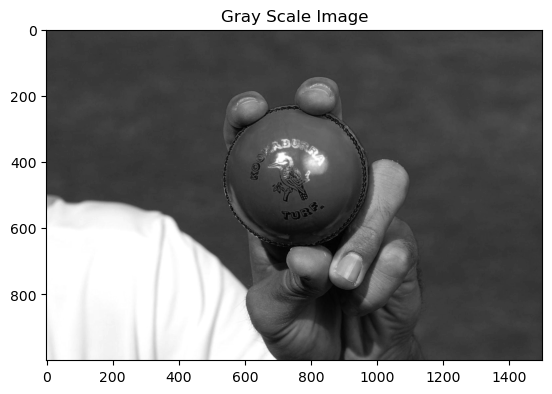

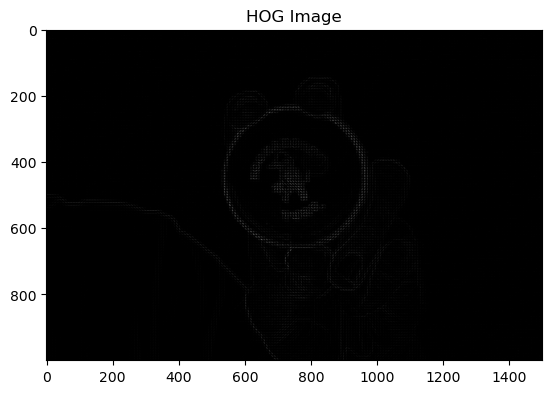

In [32]:
def extract_hog_features(image):
    """Extracts HOG (shape) features."""
    # gray_scale_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # gray = color.rgb2gray(image)       # convert to grayscale
    hog_features, hog_image = hog(
        image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys',
        visualize=True,
        transform_sqrt=True,
        feature_vector=True        
    )
    return hog_features, hog_image

#read image from folder
image=cv2.imread('../data/raw/images/no_ball/ground_12.jpg')
# image=cv2.imread('../data/raw/images/ball/img_2.png')
gray_img = color.rgb2gray(image)
plt.imshow(gray_img, cmap='gray')
plt.title('Gray Scale Image')
plt.show()
hog_features, hog_image = extract_hog_features(gray_img)

# #display hog image
# import matplotlib.pyplot as plt
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Image')
plt.show()
 

HOG feature vector length: 142884


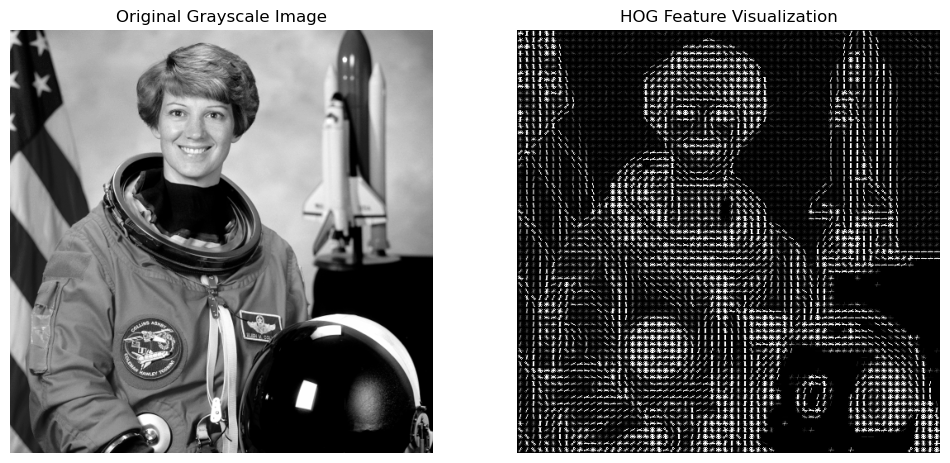

In [25]:
from skimage.feature import hog
from skimage import data, color, exposure
import matplotlib.pyplot as plt

# 1. Load a sample image
image = data.astronaut()           # built-in test image
gray = color.rgb2gray(image)       # convert to grayscale

# 2. Compute HOG features
features, hog_image = hog(
    gray,
    orientations=9,                # number of gradient bins
    pixels_per_cell=(8, 8),        # 8×8 cell size
    cells_per_block=(2, 2),        # block of 2×2 cells
    block_norm='L2-Hys',           # normalization method
    visualize=True,                # return HOG visualization
    transform_sqrt=True            # gamma normalization
)

print("HOG feature vector length:", len(features))

# 3. Rescale HOG image for display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

# 4. Show original + HOG visualization
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Original Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("HOG Feature Visualization")
plt.imshow(hog_image_rescaled, cmap='gray')
plt.axis("off")

plt.show()
